<a href="https://colab.research.google.com/github/VyshnaviBasude/Team-TrailBlazers/blob/main/Bivariant_Categorical%26Numerical%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("/content/drive/MyDrive/rideshare_kaggle.csv.zip", 'r') as zObject:

	# Extracting all the members of the zip
	# into a specific location.
	zObject.extractall( path="/content/")


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [29]:
df= pd.read_csv("/content/rideshare_kaggle.csv")
df.head(4)



,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800


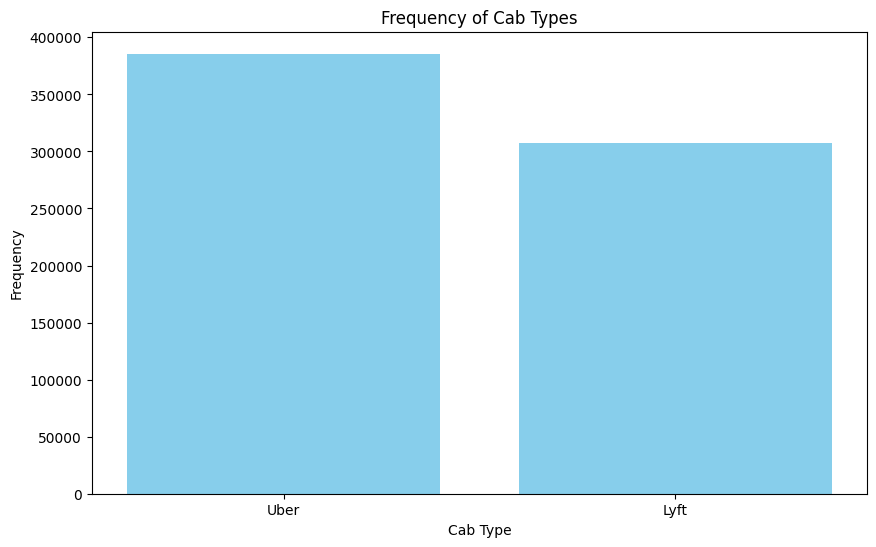

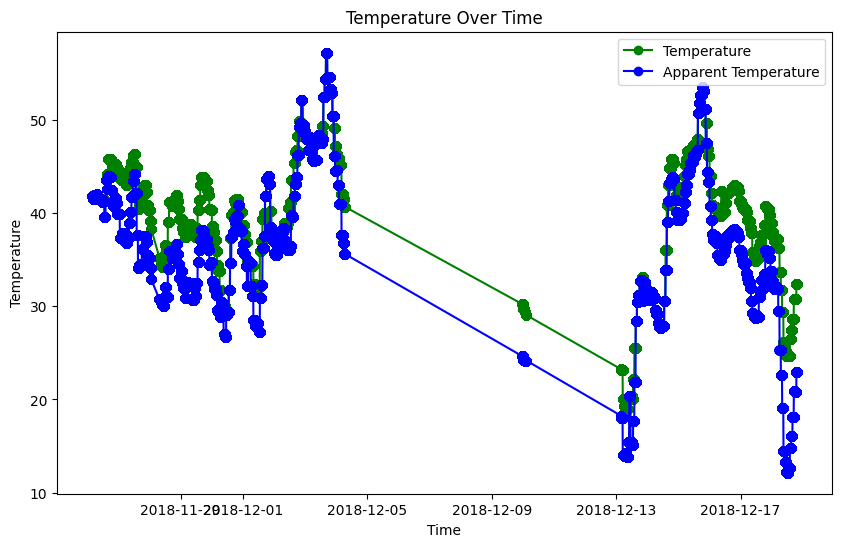

In [35]:


# Count the frequency of each cab type
cab_type_counts = df['cab_type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(cab_type_counts.index, cab_type_counts.values, color='skyblue')
plt.xlabel('Cab Type')
plt.ylabel('Frequency')
plt.title('Frequency of Cab Types')
plt.show()



# Assuming 'timestamp' is in Unix timestamp format, convert it to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Sort the data by timestamp
df = df.sort_values(by='timestamp')

# Create a line chart for temperature over time
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['temperature'], marker='o', color='green', label='Temperature')
plt.plot(df['timestamp'], df['apparentTemperature'], marker='o', color='blue', label='Apparent Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.legend()
plt.show()




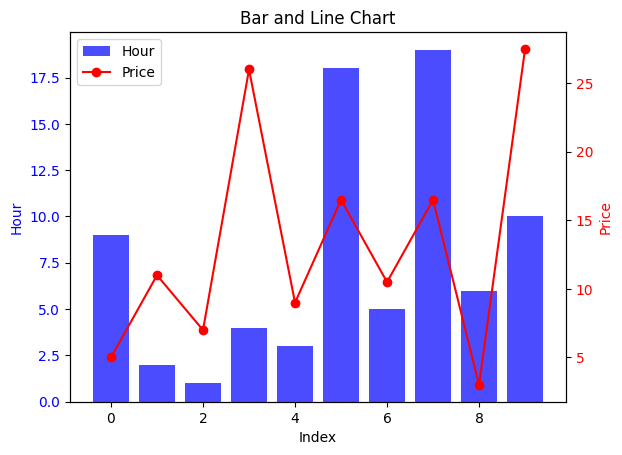

In [37]:
import matplotlib.pyplot as plt



# Create the figure and first y-axis (left)
fig, ax1 = plt.subplots()

# Bar chart for 'hour'
ax1.bar(range(len(hour)), hour, color='blue', alpha=0.7, label='Hour')
ax1.set_xlabel('Index')
ax1.set_ylabel('Hour', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second y-axis (right)
ax2 = ax1.twinx()

# Line chart for 'price'
ax2.plot(range(len(price)), price, color='red', marker='o', label='Price')
ax2.set_ylabel('Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Add title
plt.title('Bar and Line Chart')

# Show the plot
plt.show()


In [38]:


# Set the specific value for comparison
specific_value = 40

# Perform the Z-test
sample_mean = df['temperature'].mean()
sample_std = df['temperature'].std()
sample_size = len(df)

# Calculate the Z-score
z_score = (sample_mean - specific_value) / (sample_std / (sample_size**0.5))

# Set the significance level (e.g., 0.05 for 5%)
alpha = 0.05

# Find the critical Z-value for a two-tailed test
critical_z = stats.norm.ppf(1 - alpha/2)

# Compare Z-score with critical Z-value
if abs(z_score) > critical_z:
    print(f'Reject the null hypothesis. Z-score: {z_score:.2f}')
else:
    print(f'Fail to reject the null hypothesis. Z-score: {z_score:.2f}')


Reject the null hypothesis. Z-score: -51.44
